# 🧠 Machine Learning — Sprint 3
## 📊 Modelo de Regresión Múltiple — Tienda Aurelion

In [18]:
# ==============================================================================
# 1. IMPORTACIÓN DE LIBRERÍAS Y FUNCIONES CLAVE
# ==============================================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- FUNCIÓN CLAVE: CALCULAR ERROR PORCENTUAL (MAPE) ---
def mean_absolute_percentage_error(y_true, y_pred):
    """Calcula el Error Absoluto Porcentual Medio (MAPE)."""
    # Se añade una pequeña constante para evitar división por cero
    return np.mean(np.abs((y_true - y_pred) / (y_true + np.finfo(float).eps))) * 100

In [19]:
# ==============================================================================
# 2. CARGA DE DATOS Y PREPROCESAMIENTO
# ==============================================================================

RUTA_DATASET = "consolidado.csv" # Usando el archivo limpio de la Entrega 2
df = pd.read_csv(RUTA_DATASET)

# Definición de variables predictoras (X) y objetivo (y)
# Se usa 'categoria_corregida' ya que es el nombre correcto del dataset
X = df[['precio_unitario', 'cantidad', 'categoria_corregida', 'ciudad', 'medio_pago']]
y = df['importe'] 

# Codificación de variables categóricas (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# División Train/Test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"✅ Datos listos. Entrenamiento: {len(X_train)} muestras, Prueba: {len(X_test)} muestras.")

✅ Datos listos. Entrenamiento: 274 muestras, Prueba: 69 muestras.


In [20]:
# ==============================================================================
# 3. ENTRENAMIENTO Y EVALUACIÓN
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

# Cálculo de Métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("--- MÉTRICAS DE RENDIMIENTO (TEST SET) ---")
print(f"R² (Varianza Explicada): {r2:.4f}")
print(f"RMSE (Error en unidades): {rmse:.2f}")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"MAPE (Error Porcentual Medio): {mape:.2f}%")

--- MÉTRICAS DE RENDIMIENTO (TEST SET) ---
R² (Varianza Explicada): 0.8333
RMSE (Error en unidades): 1694.48
MAE (Error Absoluto Medio): 1246.05
MAPE (Error Porcentual Medio): 46.34%


In [21]:
# ==============================================================================
# 4. ANÁLISIS DE COEFICIENTES (IMPORTANCIA DE FEATURES)
# ==============================================================================

coeficientes = pd.DataFrame(modelo.coef_, X_train.columns, columns=['Impacto en Importe'])

print("\n--- COEFICIENTES DEL MODELO (TOP 5 IMPULSORES) ---")
# Mostrar los 5 coeficientes con el mayor impacto absoluto
top_coeficientes = coeficientes.reindex(
    coeficientes['Impacto en Importe'].abs().sort_values(ascending=False).index
).head(5)
print(top_coeficientes)

# Interpretación: La cantidad es el factor más importante, seguido por el medio de pago QR.


--- COEFICIENTES DEL MODELO (TOP 5 IMPULSORES) ---
                              Impacto en Importe
cantidad                             2553.841850
medio_pago_qr                         426.446874
categoria_corregida_Limpieza         -379.391278
ciudad_Rio Cuarto                    -287.465148
medio_pago_tarjeta                    205.044835


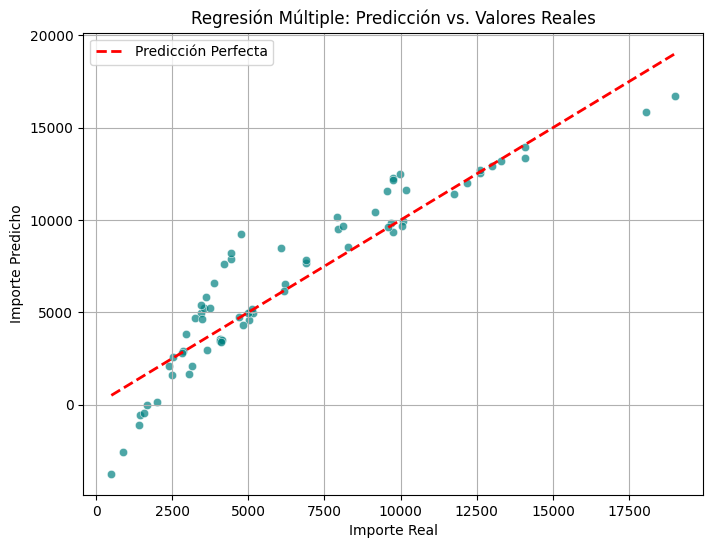

In [22]:
# ==============================================================================
# 5. VISUALIZACIÓN 1: PREDICCIÓN VS. VALORES REALES (R² VISUAL)
# ==============================================================================

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='teal')

# Línea de predicción perfecta (y = x)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', lw=2, label="Predicción Perfecta")

plt.title('Regresión Múltiple: Predicción vs. Valores Reales')
plt.xlabel('Importe Real')
plt.ylabel('Importe Predicho')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Luna\AppData\Local\Temp\ipykernel_3528\1607896236.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Impacto en Importe', y=top_coeficientes.index, data=top_coeficientes, palette='viridis')


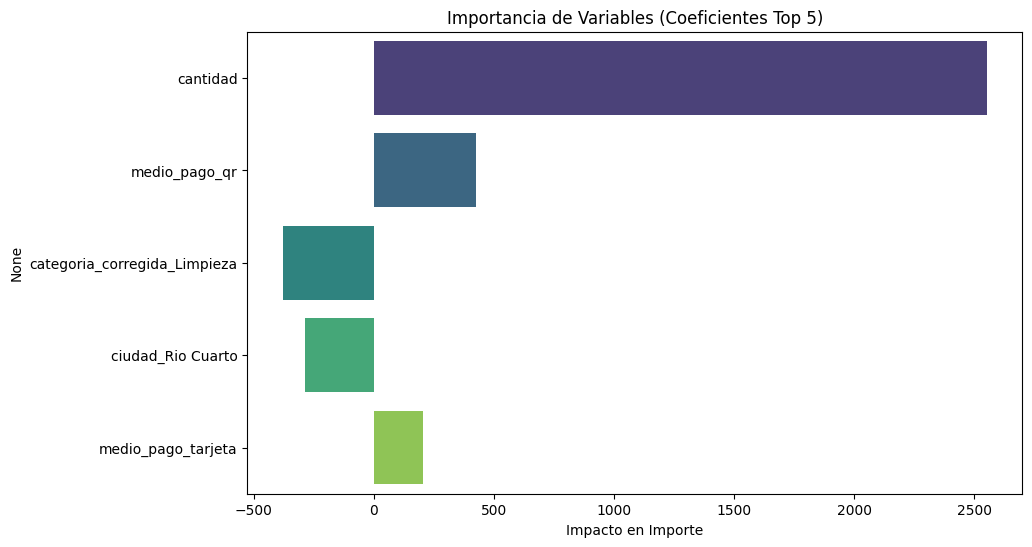

In [23]:
# ==============================================================================
# 6. VISUALIZACIÓN 2: IMPORTANCIA DE COEFICIENTES (IMPACTO)
# ==============================================================================

plt.figure(figsize=(10, 6))
sns.barplot(x='Impacto en Importe', y=top_coeficientes.index, data=top_coeficientes, palette='viridis')
plt.title('Importancia de Variables (Coeficientes Top 5)')
plt.show()

In [24]:
# 7. CÁLCULO DE MÉTRICAS
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("--- MÉTRICAS DE RENDIMIENTO (TEST SET) ---")
print(f"R² (Varianza Explicada): {r2:.4f}")
print(f"RMSE (Error en unidades): {rmse:.2f}")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"MAPE (Error Porcentual Medio): {mape:.2f}%")

--- MÉTRICAS DE RENDIMIENTO (TEST SET) ---
R² (Varianza Explicada): 0.8333
RMSE (Error en unidades): 1694.48
MAE (Error Absoluto Medio): 1246.05
MAPE (Error Porcentual Medio): 46.34%
